# An Analysis of Seoul's Bike Sharing System

## Introduction

This dataset consists of the number of public bikes rented in Seoul's bike sharing system at each hour. It also includes information about the weather and the time, such as whether it was a public holiday.

This project aims to create a model that accurately predicts the number of bikes that are rented out depending on factors such as hour of day, temperature, humidity, etc.

Included in this project is some prior data analysis that results in some interesting finds, and ultimately we conclude that many factors are quite redundant in predicting the number of bikes that are rented out in a given hour of a day.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("SeoulBikeData.csv", encoding = 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.drop(index=df.loc[df['Functioning Day']=='No'].index, inplace=True)
df.drop(columns='Functioning Day', inplace=True)

In [7]:
def plot_dec(x=None, y=None, title=None, grid='yes'):
    plt.figure(figsize=(8, 6))
    plt.xlabel(x, fontsize=14, labelpad=10)
    plt.ylabel(y, fontsize=14, labelpad=10)
    plt.title(title, fontsize=15, pad=15)
    if grid == 'yes':
        plt.grid(axis='y', which='major', zorder=0)
    return

## Analysis

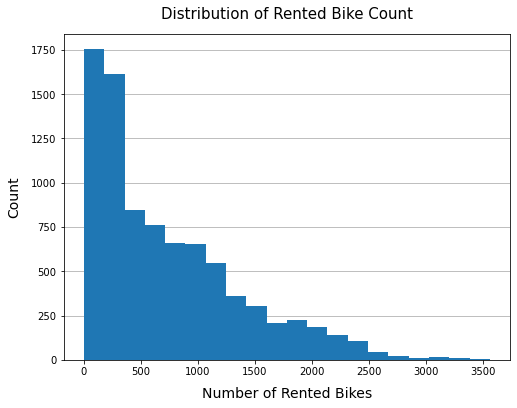

In [8]:
_=plot_dec('Number of Rented Bikes', 'Count', 'Distribution of Rented Bike Count')
_=plt.hist(df['Rented Bike Count'], bins=20, zorder=3)

Here we see that the number of rented bikes at a given hour does not follow a gaussian distribution. Given a particular hour of a day, we are far more likely to see the number of rented bikes ranging between 0 and 500 than 3000 to 3500. High numbers of rented bikes are relatively rare. In fact, there is a negative correlation between number of rented bikes and how often this number occurs.

In [9]:
from scipy.stats import boxcox

In [10]:
transformed, maxlog = boxcox(df['Rented Bike Count'])

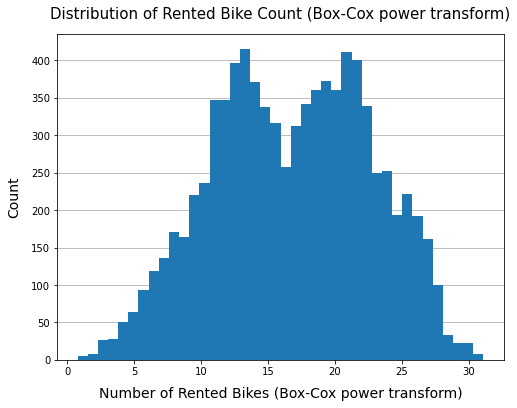

In [11]:
_=plot_dec('Number of Rented Bikes (Box-Cox power transform)', 'Count', 'Distribution of Rented Bike Count (Box-Cox power transform)')
_=plt.hist(transformed, bins=40, zorder=3)

After trying many reasonable transformations, this is the closest I could get to a gaussian distribution using the Box-Cox power transform. It is still not great and therefore I decided it best to leave the data as is.

In [12]:
from scipy.stats import skew
from scipy.stats import probplot

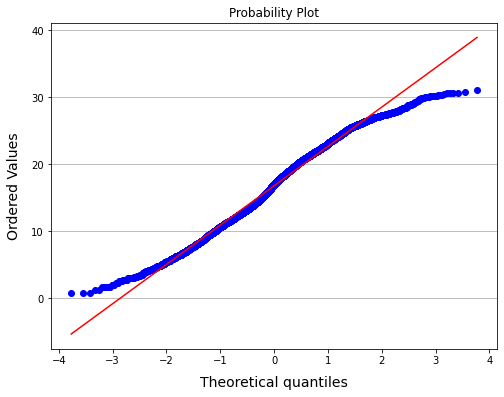

In [13]:
_=plot_dec()
_=probplot(transformed, plot=plt)

Here is a q-q plot of the data. Even after the Box-Cox power transform the data remains non-gaussian.

In [14]:
corr = df.corr()
corr

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.425256,0.562740,-0.201973,0.125022,0.212323,0.400263,0.273862,-0.128626,-0.151611
Hour,0.425256,1.000000,0.122742,-0.235937,0.287780,0.103869,0.004691,0.144658,0.014345,-0.022082
Temperature(°C),0.562740,0.122742,1.000000,0.166425,-0.038481,0.028262,0.914467,0.354844,0.052149,-0.217746
Humidity(%),-0.201973,-0.235937,0.166425,1.000000,-0.337352,-0.548542,0.539402,-0.457273,0.236917,0.110127
Wind speed (m/s),0.125022,0.287780,-0.038481,-0.337352,1.000000,0.180428,-0.177170,0.326222,-0.024931,-0.003789
Visibility (10m),0.212323,0.103869,0.028262,-0.548542,0.180428,1.000000,-0.182586,0.153046,-0.170352,-0.122860
Dew point temperature(°C),0.400263,0.004691,0.914467,0.539402,-0.177170,-0.182586,1.000000,0.098525,0.126812,-0.149760
Solar Radiation (MJ/m2),0.273862,0.144658,0.354844,-0.457273,0.326222,0.153046,0.098525,1.000000,-0.074157,-0.073380
Rainfall(mm),-0.128626,0.014345,0.052149,0.236917,-0.024931,-0.170352,0.126812,-0.074157,1.000000,0.008604
Snowfall (cm),-0.151611,-0.022082,-0.217746,0.110127,-0.003789,-0.122860,-0.149760,-0.073380,0.008604,1.000000


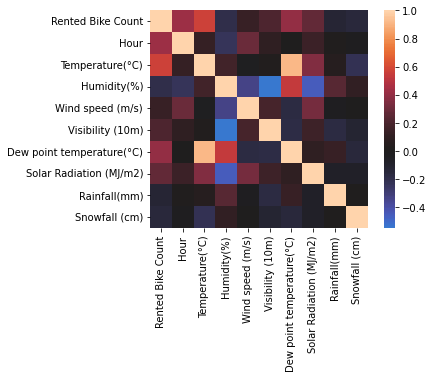

In [15]:
_=sns.heatmap(corr, square=True, center=0)

This heatmap indicates that hour of day, temperature and dew point temperature have a relatively strong correlation with the number of bikes rented out in a given hour. This is unsurprising. The remaining factors do not. However, this is only a good indication of linear correlation so there still remains some hope for the remaining data to help out in predicting the number of bikes rented out in a given hour.

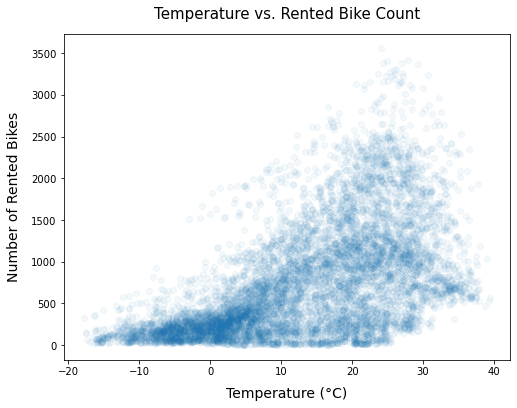

In [16]:
_=plot_dec('Temperature (°C)', 'Number of Rented Bikes', 'Temperature vs. Rented Bike Count', grid='no')
_=plt.scatter(df['Temperature(°C)'], df['Rented Bike Count'], alpha=0.05, zorder=3)

This scatter plot indicates a relatively strong correlation between temperature and the number of bikes rented out in a given hour. As the temperature increases, so to does the number of bikes rented. This sounds about right. People are more likely to ride a bike in pleasant weather. There seems to be a downward trend at temperatures above 30°. We will do our best to confirm this below.

In [17]:
np.random.seed(11)

In [18]:
def bootstrap(df, x, f=np.mean):
    stats = []
    for i in range(1000):
        resample = np.random.choice(df[x], size=len(df))
        stats.append(f(resample))
    stats = np.sort(np.array(stats))
    stats_5th = np.percentile(stats, 5)
    stats_95th = np.percentile(stats, 95)
    return stats_5th, stats_95th

In [19]:
def binner(df, x, b=20):
    bins=pd.cut(df[x], bins=b)
    df['bins']=bins
    bin_rank = pd.Series(np.arange(1, df['bins'].nunique()+1), index=df['bins'].unique().sort_values()).to_dict()
    df['rank']=df['bins'].map(bin_rank)
    return df

In [20]:
def binned_plot(df, x, y, b=20, func='median', **kwargs):
    
    df_bins = df.copy()
    df_bins = binner(df_bins, x, b=b)
    df_bins_pv = pd.pivot_table(df_bins, index='rank', values=[x, y], aggfunc=func)
    
    y_bins_c = []
    for i in np.sort(df_bins['rank'].unique()):
        c = bootstrap(df_bins[df_bins['rank']==i], y, f=np.mean if func=='mean' else np.median)
        y_bins_c.append(c)
        
    cl = np.array(df_bins_pv[y]) - np.array(y_bins_c)[:,0]
    cu = np.array(y_bins_c)[:,1] - np.array(df_bins_pv[y])
    ci = np.vstack((cl, cu))
    
    plot = plt.errorbar(df_bins_pv[x], df_bins_pv[y], yerr=np.array(ci), marker='o', linestyle='', markersize=4, **kwargs)
    
    plt.show()
    
    return

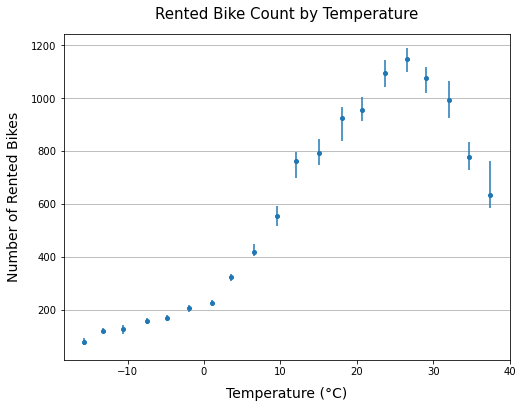

In [21]:
_=plot_dec('Temperature (°C)', 'Number of Rented Bikes', 'Rented Bike Count by Temperature')
_=binned_plot(df, 'Temperature(°C)', 'Rented Bike Count')

This binned scatter plot confirms our suspicions. The number of bikes rented out in a given hour does in fact decrease above temperatures of about 28°. The points indicate the average number of bikes rented in the relevant temperature bin and the error bars indicate a 90% confidence interval. The confidence intervals indicate whether the means are good representations of the data they summarise. The narrower the confidence interval, the better the mean represents the underlying data. In this instance, the upward and then eventual downward trend is an accurate representation of the underlying trend somewhat hidden in the unsummarised data.

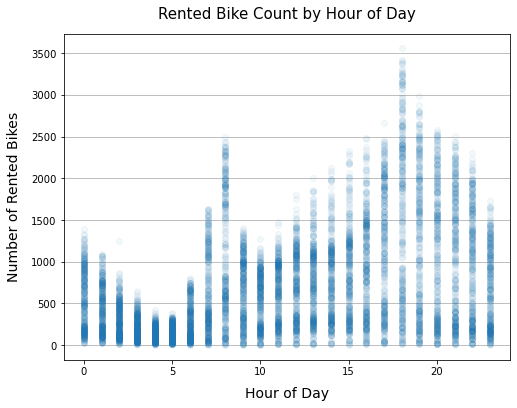

In [22]:
_=plot_dec('Hour of Day', 'Number of Rented Bikes', 'Rented Bike Count by Hour of Day')
_=plt.scatter(df['Hour'], df['Rented Bike Count'], alpha=0.05, zorder=3)

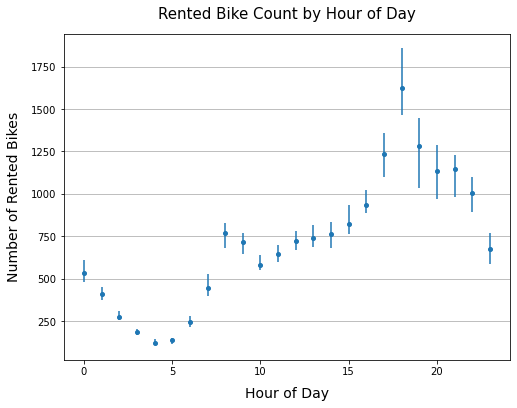

In [23]:
_=plot_dec('Hour of Day', 'Number of Rented Bikes', 'Rented Bike Count by Hour of Day')
_=binned_plot(df, 'Hour', 'Rented Bike Count', b=24, zorder=3)

The scatter plots above indicate an increase in rented bikes from 5am to 6pm. There are peaks at roughly 8am and 6pm which correspond to the times at which people travel to work and travel back respectively. Generally, the confidence intervals are small but there are exceptions, especially 5pm onwards. Further investigation can shed light on this.

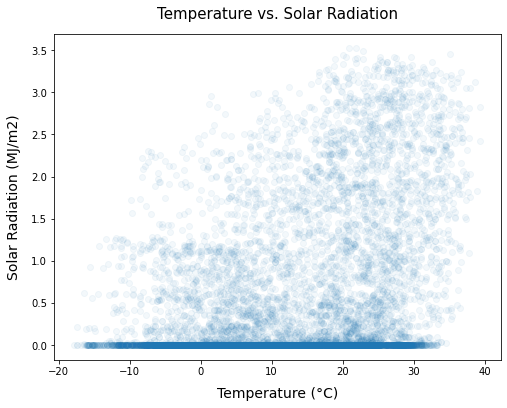

In [24]:
_=plot_dec('Temperature (°C)', 'Solar Radiation (MJ/m2)', 'Temperature vs. Solar Radiation', grid='no')
_=plt.scatter(df['Temperature(°C)'], df['Solar Radiation (MJ/m2)'], alpha=0.05, zorder=3)

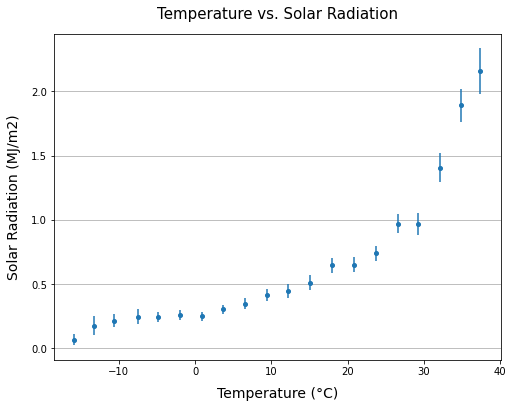

In [25]:
_=plot_dec('Temperature (°C)', 'Solar Radiation (MJ/m2)', 'Temperature vs. Solar Radiation')
_=binned_plot(df, 'Temperature(°C)', 'Solar Radiation (MJ/m2)', func='mean')

My intention is to initally predict the number of rented bikes using linear regression. As a result, we have to ensure that the features that are included in the model are non-collinear. Athough solar radiation does not have a particularly strong correlation with the number of rented bikes in a given hour, I am still checking if it is collinear with temperature which does have relatively strong correlation with the number of rented bikes. It is also useful to determine what relation solar radiation has to the number of rented bikes, for the sake of analysis alone.

If we examine the binned scatter plot above, it is quite difficult to determine whether the relation is linear. We can interpret it as a linear relation with outliers at high temperatures, or we can interpret the relation as non-linear. The general trend is that the greater the temperature, the greater the solar radiation. This accords with our intuition.

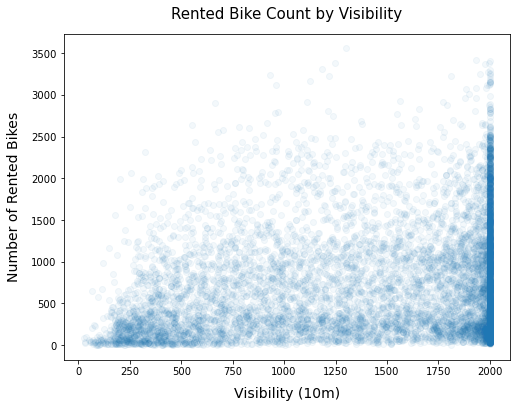

In [26]:
_=plot_dec('Visibility (10m)', 'Number of Rented Bikes', 'Rented Bike Count by Visibility', grid='no')
_=plt.scatter(df['Visibility (10m)'], df['Rented Bike Count'], alpha=0.05)

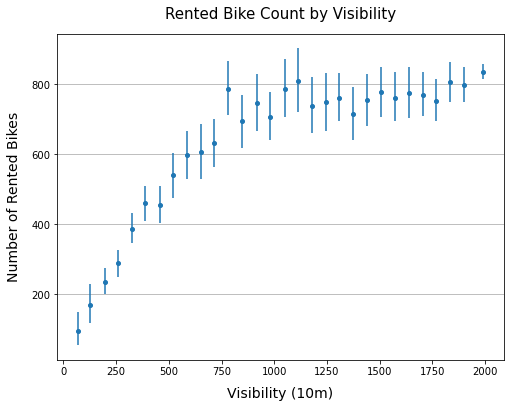

In [27]:
_=plot_dec('Visibility (10m)', 'Number of Rented Bikes', 'Rented Bike Count by Visibility')
_=binned_plot(df, 'Visibility (10m)', 'Rented Bike Count', 30, 'mean')

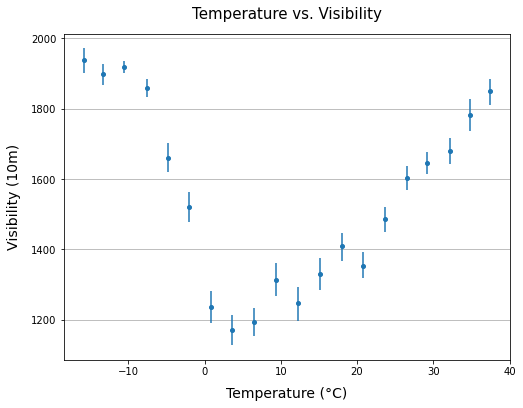

In [28]:
_=plot_dec('Temperature (°C)', 'Visibility (10m)', 'Temperature vs. Visibility')
_=binned_plot(df, 'Temperature(°C)', 'Visibility (10m)', func='mean')

The relation between visibility and the number of rented bikes seems to be non-linear if we have a look at a binned scatter plot. As visibility icreases, the number of rented bikes increases. This plateaus north of a visibility of 1100.

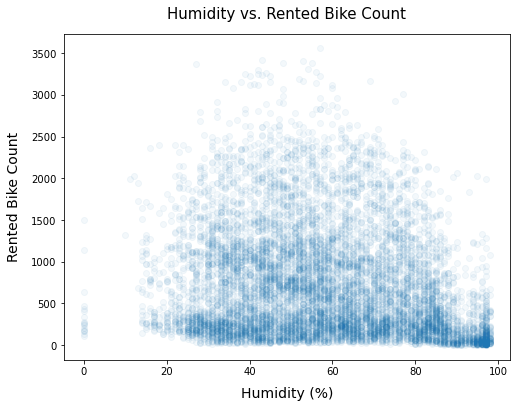

In [29]:
_=plot_dec('Humidity (%)', 'Rented Bike Count', 'Humidity vs. Rented Bike Count', grid='no')
_=plt.scatter(df['Humidity(%)'], df['Rented Bike Count'], alpha=0.05)

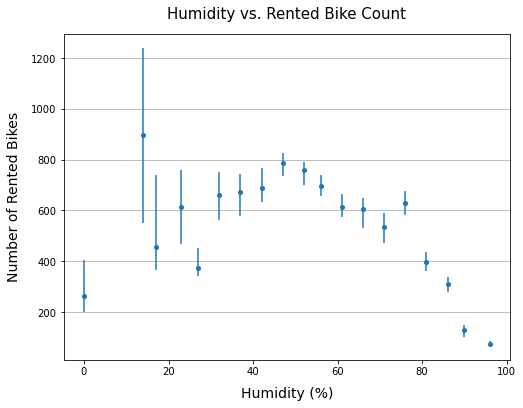

In [30]:
_=plot_dec('Humidity (%)', 'Number of Rented Bikes', 'Humidity vs. Rented Bike Count')
_=binned_plot(df, 'Humidity(%)', 'Rented Bike Count')

Likewise, the relation between humidity and the number of rented bikes is non-linear. However, there is a general downward trend. As humidity increases, the number of rented bikes decreases.

In [31]:
df2 = pd.get_dummies(df, columns=['Seasons','Holiday'])
corr2 = df2.corr()
corr2

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
Rented Bike Count,1.000000,0.425256,0.562740,-0.201973,0.125022,0.212323,0.400263,0.273862,-0.128626,-0.151611,0.165333,0.015580,0.282001,-0.458920,-0.070070,0.070070
Hour,0.425256,1.000000,0.122742,-0.235937,0.287780,0.103869,0.004691,0.144658,0.014345,-0.022082,0.001865,-0.000594,-0.000603,-0.000594,-0.000229,0.000229
Temperature(°C),0.562740,0.122742,1.000000,0.166425,-0.038481,0.028262,0.914467,0.354844,0.052149,-0.217746,0.047283,0.012123,0.677872,-0.740433,-0.057977,0.057977
Humidity(%),-0.201973,-0.235937,0.166425,1.000000,-0.337352,-0.548542,0.539402,-0.457273,0.236917,0.110127,0.023873,0.017463,0.198198,-0.240090,-0.047796,0.047796
Wind speed (m/s),0.125022,0.287780,-0.038481,-0.337352,1.000000,0.180428,-0.177170,0.326222,-0.024931,-0.003789,-0.123132,0.074645,-0.066895,0.111378,0.031432,-0.031432
Visibility (10m),0.212323,0.103869,0.028262,-0.548542,0.180428,1.000000,-0.182586,0.153046,-0.170352,-0.122860,0.111179,-0.185450,0.066203,0.011642,0.022210,-0.022210
Dew point temperature(°C),0.400263,0.004691,0.914467,0.539402,-0.177170,-0.182586,1.000000,0.098525,0.126812,-0.149760,0.049595,0.006471,0.664183,-0.723221,-0.067625,0.067625
Solar Radiation (MJ/m2),0.273862,0.144658,0.354844,-0.457273,0.326222,0.153046,0.098525,1.000000,-0.074157,-0.073380,-0.028287,0.075799,0.132320,-0.181814,-0.001963,0.001963
Rainfall(mm),-0.128626,0.014345,0.052149,0.236917,-0.024931,-0.170352,0.126812,-0.074157,1.000000,0.008604,-0.015228,0.019671,0.055087,-0.060480,-0.013301,0.013301
Snowfall (cm),-0.151611,-0.022082,-0.217746,0.110127,-0.003789,-0.122860,-0.149760,-0.073380,0.008604,1.000000,-0.017401,-0.102400,-0.103928,0.223842,-0.012043,0.012043


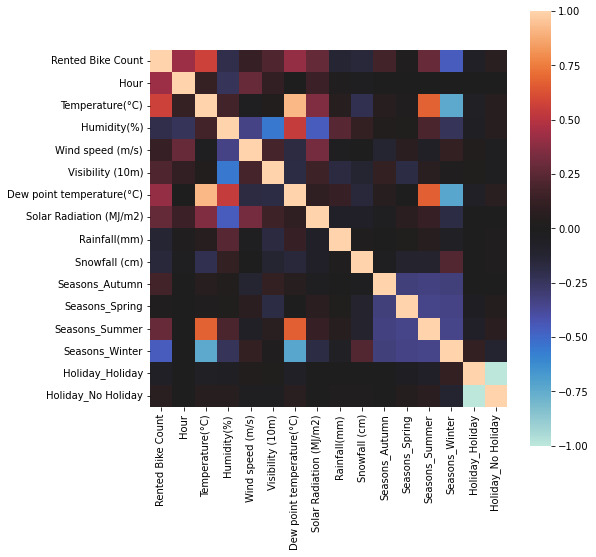

In [32]:
_=plt.figure(figsize=(8, 8))
_=sns.heatmap(corr2, square=True, center=0)

After one-hot encoding the relevant features, we see that winter season has a strong correlation with rented bike count in the heatmap above. We can hypothesise that this is due to low temperatures.

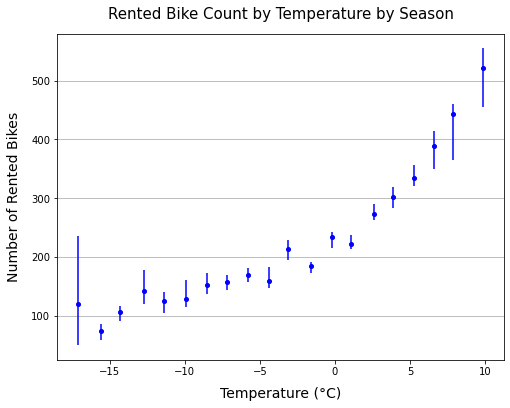

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


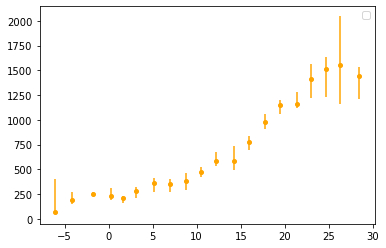

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


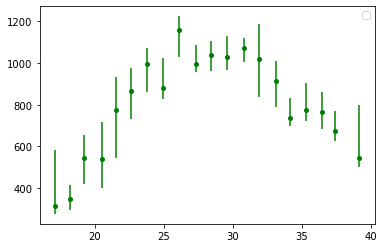

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


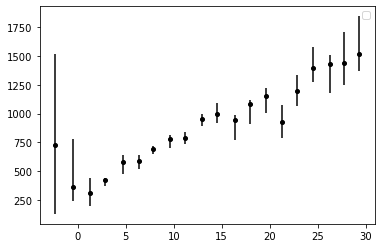

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


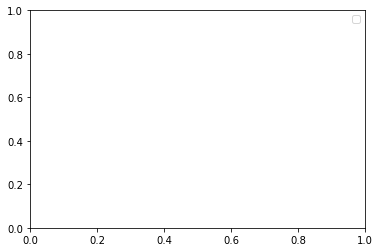

In [33]:
colour_dict={'Autumn': 'black', 'Spring': 'orange', 'Summer': 'green', 'Winter': 'blue'}
_=plot_dec('Temperature (°C)', 'Number of Rented Bikes', 'Rented Bike Count by Temperature by Season')

for i in df['Seasons'].unique():
    df_temp = df.loc[df['Seasons']==i]
    binned_plot(df_temp, 'Temperature(°C)', 'Rented Bike Count', color=colour_dict[i], label=i)
    plt.legend(loc='upper right')

This binned scatter plot is particularly revealing. One thing that strikes me as odd is that Autumn generally seems to have a higher number of rented bikes at a given temperature than Spring. One expects that bike usage will be particularly high in Spring, and at least higher than bike usage in Autumn due to the nature of these seasons. Although we see a similar range of temperatures in both seasons, Autumn is characterised by the 'end of life' per se, with the shedding of trees and the likes, whereas Spring is characterised by the blossoming of plant and wildlife. There may be underlying factors for this striking result, which requires further investigation.

Again, we see the steady, downward trend in the number of rented bikes at temperatures above 30°. This time round, however, we see that these temperatures are only seen in Summer.

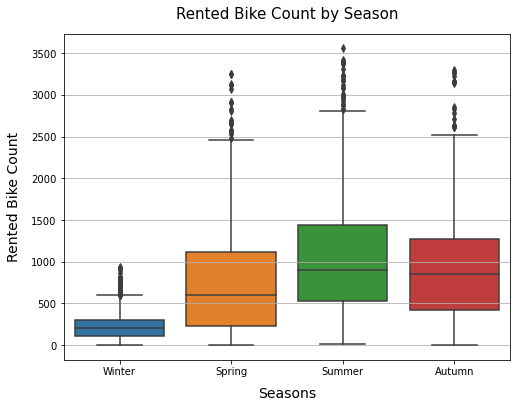

In [34]:
_=plot_dec('Seasons', 'Number of Rented Bikes', 'Rented Bike Count by Season')
_=sns.boxplot(x='Seasons', y='Rented Bike Count', data=df)

This boxplot shows the difference between Spring and Autumn more clearly. It also shows the large difference between the number of rented bikes in Winter compared to the other seasons. Whereas the other seasons are relatively close in their distributions, Winter is significantly different. The 50th percentile of Winter is lower than the 25th percentile of the other seasons. In fact, the 75th percentile of Winter is lower than the 25th percentile of Summer and Autumn. This is probably explained primarily by the extremely low temperatures observed in Winter. Naturally, people would not want to rent out a bike in such temperatures.

In [35]:
seasons_list = df['Seasons'].unique()
df_seasons_list = [df[df['Seasons']==i] for i in seasons_list]
low_temp_list = [round((len(i.loc[i['Temperature(°C)']<0, 'Rented Bike Count'])/len(i)), 2) for i in df_seasons_list]

print('')
for i, j in zip(seasons_list, low_temp_list):
    print('Percentage of temperatures below 0° in {}: {}'.format(i, j))


Percentage of temperatures below 0° in Winter: 0.64
Percentage of temperatures below 0° in Spring: 0.01
Percentage of temperatures below 0° in Summer: 0.0
Percentage of temperatures below 0° in Autumn: 0.01


As we can see, 64% percent of temperatures in Winter were lower than 0°. This is significantly higher than the other seasons, with Autumn and Spring at 1% and Summer at 0%. We can therefore expect Winter playing a larger role in our models in predicting the number of bike rents, at least relative to the other seasons.

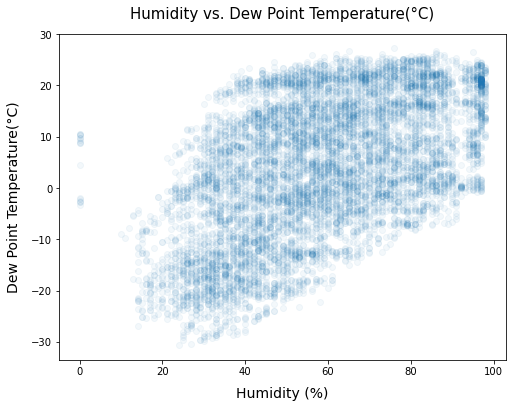

In [36]:
_=plot_dec('Humidity (%)', 'Dew Point Temperature(°C)', 'Humidity vs. Dew Point Temperature(°C)', grid='no')
_=plt.scatter(df['Humidity(%)'], df['Dew point temperature(°C)'], alpha=0.05)

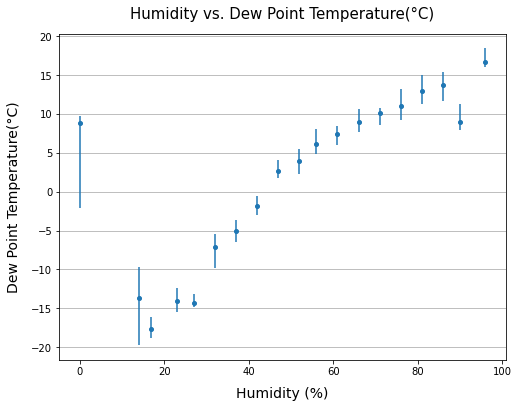

In [37]:
_=plot_dec('Humidity (%)', 'Dew Point Temperature(°C)', 'Humidity vs. Dew Point Temperature(°C)')
_=binned_plot(df, 'Humidity(%)', 'Dew point temperature(°C)')

The data points on the far left are anomalies and are only but a few so they can be safely ignored. The greater the humidity, the greater the dew point temperature. This is a known empirical fact and so it is unsurprising. It is nice to see our data confirming what we already know.

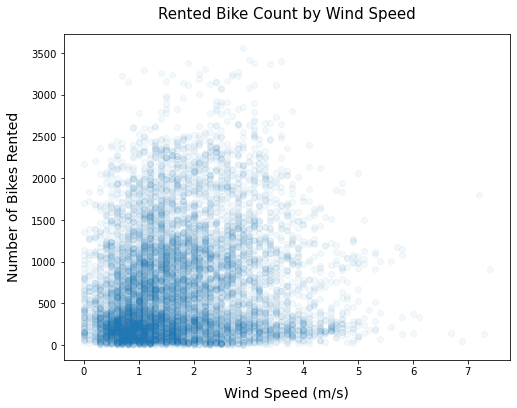

In [38]:
_=plot_dec('Wind Speed (m/s)', 'Number of Bikes Rented', 'Rented Bike Count by Wind Speed', grid='no')
_=plt.scatter(df['Wind speed (m/s)'], df['Rented Bike Count'], alpha=0.05)

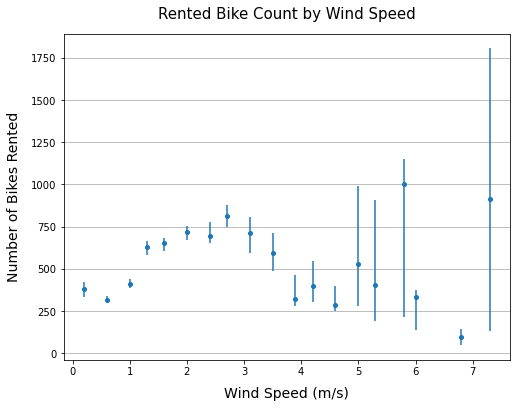

In [39]:
_=plot_dec('Wind Speed (m/s)', 'Number of Bikes Rented', 'Rented Bike Count by Wind Speed')
_=binned_plot(df, 'Wind speed (m/s)', 'Rented Bike Count')

It is difficult to point out a relation between wind speed and the number of bikes rented. The confidence intervals are all over the place and so it is not particularly easy to point out any trends in the data. Changing the number of bins does not help. It would be unsurprising if wind speed had little to no role in our predictive models.

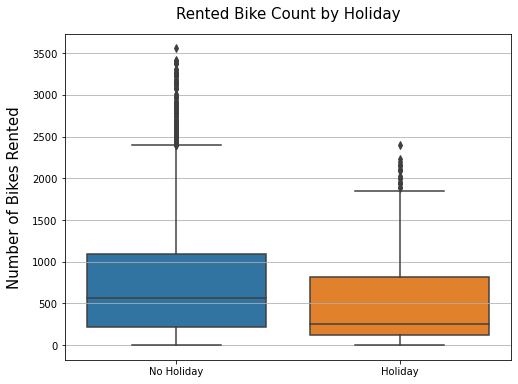

In [40]:
_=plot_dec(title='Rented Bike Count by Holiday')
_=sns.boxplot(y='Rented Bike Count', x='Holiday', data=df).set(xlabel=None)
_=plt.ylabel('Number of Bikes Rented', fontsize=15, labelpad=10)

The number of bikes rented during the holiday seems to be lower than the number of bikes rented otherwise. I am not sure what is precisely meant by holiday and I have been unsuccessful in retrieving this information. Therefore I cannot comment on this any further with such little information.

This completes our brief analysis of the data we have. We have learnt a lot of valuable things that has led to further lines of enquiry and avenues of investigation. We will now move onto creating predictive models.

## Predictive Models

We will create a few predictive models and use the best performing model as our final model. We will start simple with linear regression and work our way towards gradient boosting.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [42]:
X = df[['Hour', 'Temperature(°C)']].copy()
y = df['Rented Bike Count'].copy()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.3)

In [44]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [45]:
cvs = cross_val_score(linreg, X_train, y_train, cv=10)
cvs_avg = np.mean(cvs)
cvs_avg

0.4441195793066169

In [46]:
linreg_rmse = mean_squared_error(y_test, linreg_pred, squared=False)

In [47]:
def print_perf(model, train=None, cv=None, test=None, rmse=None):
    print('')
    if train != None:
        print('{} training dataset score: {}'.format(model, round(train, 2)))
    if cv != None:
        print('{} CV score: {}'.format(model, round(cv, 2)))
    if test != None:
        print('{} test dataset score: {}'.format(model, round(test, 2)))
    if rmse != None:
        print('')
        print('{} RMSE: {}'.format(model, round(rmse)))
    return

In [48]:
linreg_train_score = linreg.score(X_train, y_train)
linreg_test_score = linreg.score(X_test, y_test)
_=print_perf('Linear Regression', linreg_train_score, cvs_avg, linreg_test_score, linreg_rmse)


Linear Regression training dataset score: 0.45
Linear Regression CV score: 0.44
Linear Regression test dataset score: 0.45

Linear Regression RMSE: 485


After preparing the dataset and importing the relevant packages, a quick linear regression using the hour of day and temperature as predictors gives us a test score of 0.45 which is not great. We used these two features since they had the highest correlation with the number of rented bikes and they satisfy, to some extent, the assumptions of linear regression. 

The result is unsurprising as our earlier analysis showed that although there was a linear trend between the predictors and the target variable, the residuals would be quite high due to the distance between data points in the y-direction. We have got an RMSE of 485 which is quite large considering that the maxmimum number of rented bikes is just north of 3500.

In [49]:
ridge = Ridge()
params = {'alpha': [1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189]}
r_cv = GridSearchCV(ridge, param_grid=params, cv=10)
r_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1181, 1182, 1183, 1184, 1185, 1186, 1187,
                                   1188, 1189]})

In [50]:
r_cv.best_estimator_

Ridge(alpha=1189)

In [51]:
r_cv.best_score_

0.4441227663305476

In [52]:
cv_results = pd.DataFrame(r_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005982,0.001893,0.005389,0.003994,1181,{'alpha': 1181},0.434369,0.457254,0.458045,0.458147,0.407129,0.467289,0.459791,0.428999,0.445964,0.424240,0.444123,0.018537,9
1,0.004688,0.000898,0.002892,0.000537,1182,{'alpha': 1182},0.434369,0.457253,0.458045,0.458147,0.407129,0.467289,0.459792,0.428999,0.445964,0.424240,0.444123,0.018537,8
2,0.004089,0.000829,0.002394,0.000662,1183,{'alpha': 1183},0.434369,0.457253,0.458045,0.458147,0.407129,0.467289,0.459792,0.428999,0.445964,0.424240,0.444123,0.018537,7
3,0.004588,0.000488,0.003091,0.000299,1184,{'alpha': 1184},0.434369,0.457253,0.458045,0.458147,0.407129,0.467289,0.459792,0.428999,0.445964,0.424240,0.444123,0.018537,6
4,0.004787,0.000599,0.002693,0.000456,1185,{'alpha': 1185},0.434369,0.457253,0.458045,0.458147,0.407129,0.467289,0.459792,0.428999,0.445964,0.424241,0.444123,0.018537,5
5,0.005186,0.000746,0.002893,0.000300,1186,{'alpha': 1186},0.434369,0.457253,0.458045,0.458147,0.407129,0.467289,0.459792,0.428999,0.445964,0.424241,0.444123,0.018537,4
6,0.004688,0.001183,0.002991,0.000892,1187,{'alpha': 1187},0.434369,0.457253,0.458045,0.458147,0.407130,0.467289,0.459792,0.428999,0.445963,0.424241,0.444123,0.018537,3
7,0.004488,0.001357,0.002793,0.000870,1188,{'alpha': 1188},0.434369,0.457253,0.458045,0.458147,0.407130,0.467289,0.459792,0.428999,0.445963,0.424241,0.444123,0.018537,2
8,0.004288,0.000897,0.002693,0.000898,1189,{'alpha': 1189},0.434369,0.457252,0.458045,0.458147,0.407130,0.467289,0.459792,0.428999,0.445963,0.424241,0.444123,0.018537,1


Ride regression does not seem to cope any better better based on initial impressions. We will optimise the alpha parameter to determine if we can salvage a better result.

In [53]:
op_ridge = Ridge(alpha=1189)
op_ridge.fit(X_train, y_train)
op_ridge_train_score = op_ridge.score(X_train, y_train)
op_ridge_test_score = op_ridge.score(X_test, y_test)
op_ridge_pred = op_ridge.predict(X_test)

In [54]:
ridge_cv = cross_val_score(op_ridge, X_train, y_train, cv=10)
ridge_cv_mean = np.mean(ridge_cv)
ridge_cv_mean

0.4441227663305476

In [55]:
ridge_rmse = mean_squared_error(y_test, op_ridge_pred, squared=False)

In [56]:
_=print_perf('Ridge regression', op_ridge_train_score, ridge_cv_mean, op_ridge_test_score, ridge_rmse)


Ridge regression training dataset score: 0.45
Ridge regression CV score: 0.44
Ridge regression test dataset score: 0.45

Ridge regression RMSE: 485


Ridge regression does not fair better. After tuning the alpha parameter, we get identical scores and RMSE. Linear models do not seem to be the right choice for this dataset.

In [57]:
X2 = df2.iloc[:,2:].copy()

In [58]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=11, test_size=0.3)

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [60]:
df2.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons_Autumn                        uint8
Seasons_Spring                        uint8
Seasons_Summer                        uint8
Seasons_Winter                        uint8
Holiday_Holiday                       uint8
Holiday_No Holiday                    uint8
dtype: object

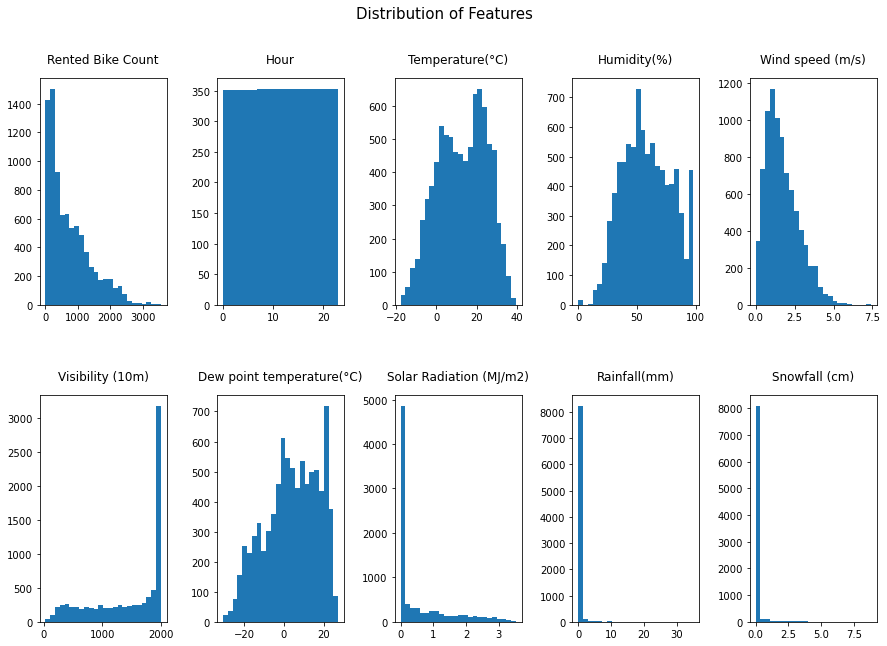

In [61]:
fig2, ax2 = plt.subplots(2, 5, figsize=(15, 10))
_=plt.subplots_adjust(hspace=0.4, wspace=0.4)
_=plt.suptitle('Distribution of Features', fontsize=15)

ax2_list = [ax2[i][j] for i in range(2) for j in range(5)]
var_list = df2.columns.values[1:11]

for m, n in zip(ax2_list, var_list):
    m.hist(df2.loc[:, n], bins=24)
    m.set_title(str(n), pad=15)

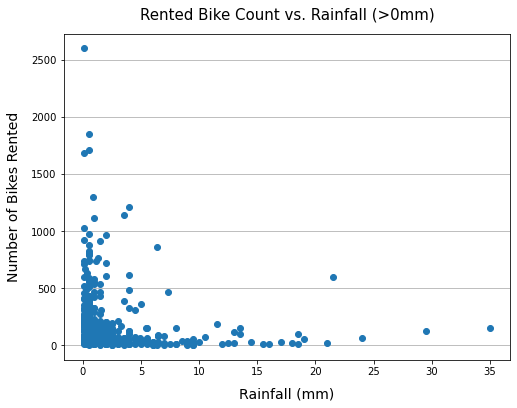

In [62]:
_=plot_dec('Rainfall (mm)', 'Number of Bikes Rented', 'Rented Bike Count vs. Rainfall (>0mm)')
_=plt.scatter(df.loc[df['Rainfall(mm)']!=0, 'Rainfall(mm)'], df.loc[df['Rainfall(mm)']!=0, 'Rented Bike Count'], zorder=3)

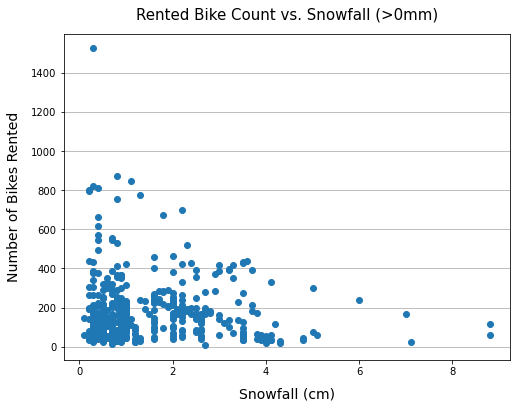

In [63]:
_=plot_dec('Snowfall (cm)', 'Number of Bikes Rented', 'Rented Bike Count vs. Snowfall (>0mm)')
_=plt.scatter(df.loc[df['Snowfall (cm)']!=0, 'Snowfall (cm)'], df.loc[df['Snowfall (cm)']!=0, 'Rented Bike Count'], zorder=3)

Since the algorithms we will use henceforth can use any feature with little to no restrictions (as when compared to linear regression), we take a closer look at some features we haven't looked at prior to delving into predictive modelling. 

It seems like as rainfall and snowfall increases, the number of bikes rented decreases. This is unsurprising. We see nothing out of the ordinary when looking at the distribution of the features in this dataset.

In [64]:
dt = DecisionTreeRegressor(random_state=11)
dt.fit(X2_train, y2_train)
dt_train_score = dt.score(X2_train, y2_train)
dt_test_score = dt.score(X2_test, y2_test)

In [65]:
print('Depth of decision tree: ' + str(dt.get_depth()))
print('Number of leaves of decision tree: ' + str(dt.get_n_leaves()))

Depth of decision tree: 31
Number of leaves of decision tree: 5845


In [66]:
_=print_perf(model='Decision tree', train=dt_train_score, test=dt_test_score)


Decision tree training dataset score: 1.0
Decision tree test dataset score: 0.75


We begin with the decision tree algorithm. An initial model gives us very high variance, which is usual if hyperparameters are not tuned. We get a training score of 1.0 and a test score of 0.75. Let us move onto hyperparameter tuning.

In [67]:
dt_params = {'max_depth': [6, 7, 8, 9, 10]}
dt = DecisionTreeRegressor()
dt_cv = GridSearchCV(dt, param_grid=dt_params, cv=10)
dt_cv.fit(X2_train, y2_train)
dt_cv_results = pd.DataFrame(dt_cv.cv_results_)
dt_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019952,0.005782,0.001990,0.000769,6,{'max_depth': 6},0.748551,0.792138,0.784298,0.756041,0.737874,0.738696,0.759641,0.747805,0.766279,0.744955,0.757628,0.017526,5
1,0.022109,0.002747,0.001997,0.000642,7,{'max_depth': 7},0.770839,0.816320,0.813526,0.780903,0.773897,0.764676,0.784281,0.772567,0.784806,0.747859,0.780968,0.019800,4
2,0.024137,0.001990,0.002392,0.000796,8,{'max_depth': 8},0.769215,0.843927,0.809782,0.789913,0.781915,0.772100,0.784565,0.789654,0.805333,0.768700,0.791510,0.021938,3
3,0.024529,0.002199,0.001995,0.000447,9,{'max_depth': 9},0.781263,0.853093,0.812258,0.803264,0.803038,0.785343,0.801889,0.807644,0.797711,0.774688,0.802019,0.020548,1
4,0.033215,0.008343,0.002293,0.000640,10,{'max_depth': 10},0.762827,0.856897,0.792119,0.803324,0.783417,0.786879,0.795854,0.795414,0.798226,0.774996,0.794995,0.023570,2


In [68]:
dt_cv.best_params_

{'max_depth': 9}

In [69]:
max_depth = [3, 5, 6, 7, 8, 9, 11, 13]
dt_train_score = []
cv_score = []

for depth in max_depth:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X2_train, y2_train)
    train_score = dt.score(X2_train, y2_train)
    cv_mean_score = float(np.mean(cross_val_score(dt, X2_train, y2_train, cv=5)))
    dt_train_score.append(train_score)
    cv_score.append(cv_mean_score)

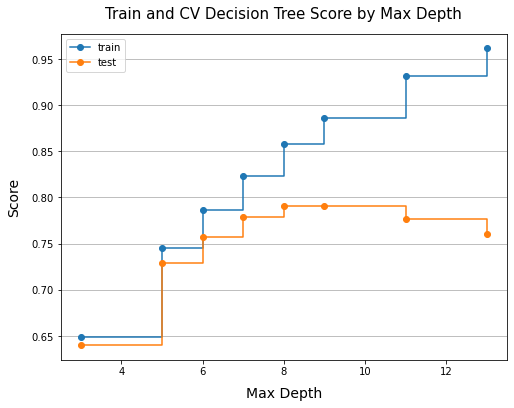

In [70]:
_=plot_dec('Max Depth', 'Score', 'Train and CV Decision Tree Score by Max Depth')
_=plt.plot(max_depth, dt_train_score, label='train', marker='o', drawstyle='steps-post')
_=plt.plot(max_depth, cv_score, label='test', marker='o', drawstyle='steps-post')
_=plt.legend()

Although GridSearchCV determined a max_depth of 9 to be of best performance, the graph above shows us that it suffers from fairly high variance. The difference between the training score and the average CV score is almost 0.1. A max_depth of 6 seems to be a decent compromise, only performing slightly worse than a max depth of 9 with a more respectable variance. We will choose a max depth of 6 for our final decision tree model.

In [71]:
dt = DecisionTreeRegressor(random_state=13, max_depth=6)
dt.fit(X2_train, y2_train)
dt_pred = dt.predict(X2_test)
dt_train_score = dt.score(X2_train, y2_train)

In [72]:
dt_cvs = cross_val_score(dt, X2_train, y2_train, cv=10)
dt_cvs_mean = np.mean(dt_cvs)

In [73]:
dt_test_score = dt.score(X2_test, y2_test)

In [74]:
dt_rmse = mean_squared_error(y2_test, dt_pred, squared=False)

In [75]:
_=print_perf('Decision tree', dt_train_score, dt_cvs_mean, dt_test_score, dt_rmse)


Decision tree training dataset score: 0.79
Decision tree CV score: 0.76
Decision tree test dataset score: 0.77

Decision tree RMSE: 314


The decision tree algorithm has done far better than linear regression. It scored 0.77 compared to the linear regression score of 0.45 and the RMSE of 314 is a lot lower than the linear regression RMSE of 485. We will now use the random forest algorithm to try and improve these results even further.

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf = RandomForestRegressor(random_state=11, max_features=1/3, oob_score=True, max_depth=10)
rf.fit(X2_train, y2_train)
rf_train_score = rf.score(X2_train, y2_train)
rf_oob_score = rf.oob_score_

In [78]:
_=print_perf(model='Random Forest', train=rf_train_score)
print('{} OOB score: {}'.format('Random forest', round(rf_oob_score, 2)))


Random Forest training dataset score: 0.9
Random forest OOB score: 0.85


The random forest algorithm looks promising. It has a better score than the decision tree algorithm and the variance is not too high. We will now tune hyperparameters to get a better result.

In [79]:
rf_params = {'max_depth': [11, 12, 13]}
rf = RandomForestRegressor(random_state=11, oob_score=True, max_features=1/3)

In [80]:
rf_gcv = GridSearchCV(rf, param_grid=rf_params, cv=10)
rf_gcv.fit(X2_train, y2_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_features=0.3333333333333333,
                                             oob_score=True, random_state=11),
             param_grid={'max_depth': [11, 12, 13]})

In [81]:
rf_gcv_results = pd.DataFrame(rf_gcv.cv_results_)
rf_gcv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.375947,0.368406,0.032281,0.014175,11,{'max_depth': 11},0.848682,0.863665,0.865115,0.865808,0.836853,0.845738,0.870870,0.850953,0.865319,0.835729,0.854873,0.012228,3
1,1.439418,0.145359,0.030015,0.007976,12,{'max_depth': 12},0.857150,0.870150,0.865601,0.866991,0.840576,0.852354,0.875826,0.856008,0.868693,0.840348,0.859370,0.011625,2
2,1.570343,0.197161,0.032502,0.005791,13,{'max_depth': 13},0.861569,0.875019,0.871445,0.870796,0.843192,0.857070,0.876214,0.861579,0.872186,0.846045,0.863511,0.011189,1


In [82]:
rf_gcv.best_params_

{'max_depth': 13}

In [83]:
rf_max_depth = [6, 7, 8, 9, 10, 11]
rf_train_score = []
rf_oob_score = []

In [84]:
for depth in rf_max_depth:
    rf = RandomForestRegressor(max_depth=depth, random_state=11, oob_score=True, max_features=1/3)
    rf.fit(X2_train, y2_train)
    train_score = rf.score(X2_train, y2_train)
    oob_score = rf.oob_score_
    rf_train_score.append(train_score)
    rf_oob_score.append(oob_score)

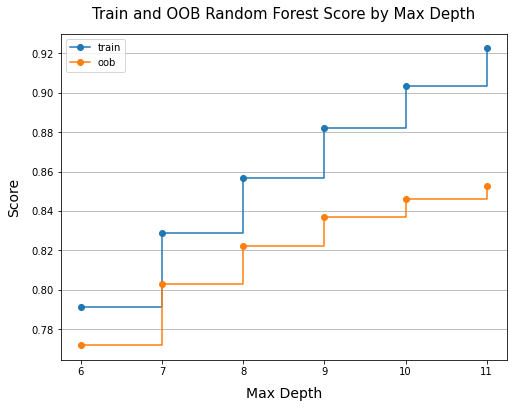

In [85]:
_=plot_dec('Max Depth', 'Score', 'Train and OOB Random Forest Score by Max Depth')
_=plt.plot(rf_max_depth, rf_train_score, label='train', marker='o', drawstyle='steps-post')
_=plt.plot(rf_max_depth, rf_oob_score, label='oob', marker='o', drawstyle='steps-post')
_=plt.legend()

In [86]:
rf_diff_score = pd.DataFrame(index=rf_max_depth, data=np.array(rf_train_score)-np.array(rf_oob_score))
rf_diff_score.columns = ['Score Difference']
rf_diff_score

,Score Difference
6,0.019046
7,0.025778
8,0.034528
9,0.045025
10,0.057456
11,0.069986


A GridSearchCV indicates 13 to be the best performer, but the graph above indicates that the greater the max depth, the greater the variance and hence the more overfit the model will be. A max depth of 11 results in a score difference of about 0.07 and so a max depth of 13 will bring about a greater difference. The gain in accuracy is not high enough to warrant such high variances. 

A compromise would be a max depth of 8. The difference in score between the training score and the CV score is only 0.03 and the performance loss is roughly the same. 

In [87]:
rf = RandomForestRegressor(random_state=11, oob_score=True, max_depth=8, max_features=1/3)
rf.fit(X2_train, y2_train)
op_rf_pred = rf.predict(X2_test)
op_rf_train_score = rf.score(X2_train, y2_train)

In [88]:
rf_cv = cross_val_score(rf, X2_train, y2_train, cv=10)
rf_cv_mean = np.mean(rf_cv)

In [89]:
op_rf_test_score = rf.score(X2_test, y2_test)

In [90]:
op_rf_rmse = mean_squared_error(y2_test, op_rf_pred, squared=False)

In [91]:
_=print_perf('Random forest', op_rf_train_score, rf_cv_mean, op_rf_test_score, op_rf_rmse)


Random forest training dataset score: 0.86
Random forest CV score: 0.82
Random forest test dataset score: 0.82

Random forest RMSE: 276


The random forest algorithm bests the decision tree algorithm. The random forest algorithm has a better score than the decision tree algorithm while keeping variance in check. The RMSE is also lower and hence better. We will now move onto the gradient boosting algorithm.

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
gb = GradientBoostingRegressor(random_state=11, n_estimators= 1000, learning_rate=0.1)
gb.fit(X2_train, y2_train)
gb_train_score = gb.score(X2_train, y2_train) 
gb_test_score = gb.score(X2_test, y2_test)

In [94]:
_=print_perf(model='Gradient boosting', train=gb_train_score, test=gb_test_score)


Gradient boosting training dataset score: 0.94
Gradient boosting test dataset score: 0.87


An initial look at the gradient boosting algorithm looks promising. The gradient boosting score is higher than even that of the random forest algorithm, while keeping variance relatively low. We will now tune some hyperparameters.

In [95]:
gb_n_estimators = [100, 200, 300, 400, 500]
gb_train_score = []
gb_cv_score = []

for estimator in gb_n_estimators:
    gb = GradientBoostingRegressor(random_state=12, learning_rate=0.1, n_estimators=estimator)
    gb.fit(X2_train, y2_train)
    train_score = gb.score(X2_train, y2_train)
    gb_cv = cross_val_score(gb, X2_train, y2_train, cv=5)
    cv_score = np.mean(gb_cv)
    gb_train_score.append(train_score)
    gb_cv_score.append(cv_score)

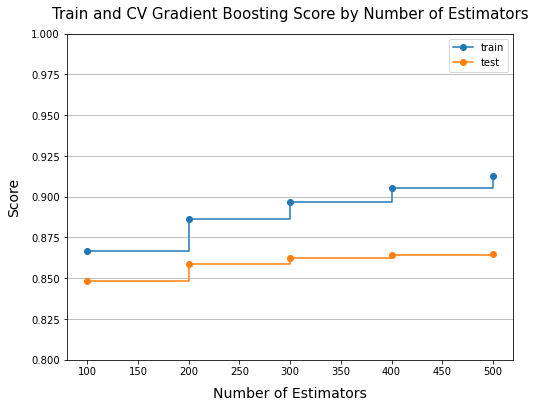

In [96]:
_=plot_dec('Number of Estimators', 'Score', 'Train and CV Gradient Boosting Score by Number of Estimators')
_=plt.plot(gb_n_estimators, gb_train_score, label='train', marker='o', drawstyle='steps-post')
_=plt.plot(gb_n_estimators, gb_cv_score, label='test', marker='o', drawstyle='steps-post')
_=plt.legend()
_=plt.ylim([0.8,1])

As the number of estimators increase, variance increases yet the test score barely improves. This indicates that the predictions aren't getting much better and therefore a low number of estimators give a better bang for your buck. They retain high predictive power while remaining relatively frugal in power consumption. From this graph, 200 or 300 estimators seems like a reasonable choice.

In [97]:
gb_subsample = [0.5, 0.7, 1]
gb_train_score = []
gb_cv_score = []

for subsample in gb_subsample:
    gb = GradientBoostingRegressor(random_state=12, subsample=subsample, learning_rate=0.1,
                                  n_estimators=200)
    gb.fit(X2_train, y2_train)
    train_score = gb.score(X2_train, y2_train)
    gb_cv = cross_val_score(gb, X2_train, y2_train, cv=5)
    cv_score = np.mean(gb_cv)
    gb_train_score.append(train_score)
    gb_cv_score.append(cv_score)

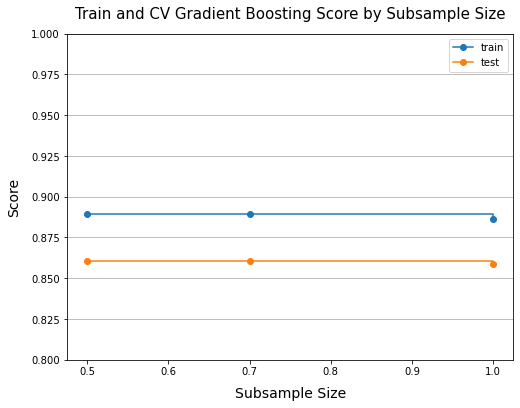

In [98]:
_=plot_dec('Subsample Size', 'Score', 'Train and CV Gradient Boosting Score by Subsample Size')
_=plt.plot(gb_subsample, gb_train_score, label='train', marker='o', drawstyle='steps-post')
_=plt.plot(gb_subsample, gb_cv_score, label='test', marker='o', drawstyle='steps-post')
_=plt.legend()
_=plt.ylim([0.8 ,1])

Tuning sample size does not do much. As a result, we can set sample size to 0.5 to reduce power consumption, increase computational speed and decrease computational time.

In [99]:
gb_max_features = [1/3, 1/2, 1]
gb_train_score = []
gb_cv_score = []

for max_features in gb_max_features:
    gb = GradientBoostingRegressor(random_state=12, subsample=0.7, learning_rate=0.1, max_features=max_features,
                                  n_estimators=200)
    gb.fit(X2_train, y2_train)
    train_score = gb.score(X2_train, y2_train)
    gb_cv = cross_val_score(gb, X2_train, y2_train, cv=5)
    cv_score = np.mean(gb_cv)
    gb_train_score.append(train_score)
    gb_cv_score.append(cv_score)

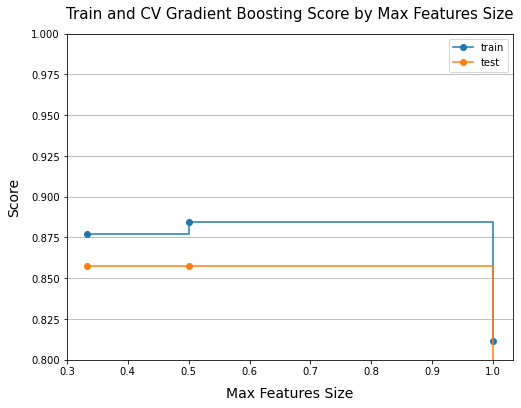

In [100]:
_=plot_dec('Max Features Size', 'Score', 'Train and CV Gradient Boosting Score by Max Features Size')
_=plt.plot(gb_max_features, gb_train_score, label='train', marker='o', drawstyle='steps-post')
_=plt.plot(gb_max_features, gb_cv_score, label='test', marker='o', drawstyle='steps-post')
_=plt.legend()
_=plt.ylim([0.8, 1])

Altering the proportion of features examined at each node did not improve predictive power moving from 0.3 to 0.5, but it dropped when all features were examined at each node. Therefore keeping this as low as possible will reduce power consumption, increase computational speed and decrease computational time.

In [101]:
gb = GradientBoostingRegressor(random_state=11, learning_rate=0.1)
gb_params = dict()
gb_params['max_features'] = [1/3, 1/2]
gb_params['subsample'] = [0.5, 0.7]
gb_params['n_estimators'] = [200, 300]

In [102]:
gb_gcv = GridSearchCV(gb, param_grid=gb_params)
gb_gcv.fit(X2_train, y2_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=11),
             param_grid={'max_features': [0.3333333333333333, 0.5],
                         'n_estimators': [200, 300], 'subsample': [0.5, 0.7]})

In [103]:
gb_gcv.best_params_

{'max_features': 0.5, 'n_estimators': 300, 'subsample': 0.5}

In [104]:
gb_gcv.best_score_

0.8610382456956149

In [105]:
gb = GradientBoostingRegressor(random_state=11, n_estimators=300, max_features=0.5, subsample=0.5, learning_rate=0.1)
gb.fit(X2_train, y2_train)

GradientBoostingRegressor(max_features=0.5, n_estimators=300, random_state=11,
                          subsample=0.5)

In [106]:
gb_cv = cross_val_score(gb, X2_train, y2_train, cv=5)
gb_cv_mean = np.mean(gb_cv)

In [107]:
final_pred = gb.predict(X2_test)
op_gb_train_score = gb.score(X2_train, y2_train)
op_gb_test_score = gb.score(X2_test, y2_test)
op_gb_rmse = mean_squared_error(y2_test, final_pred, squared=False)

In [108]:
_=print_perf('Gradient boosting', op_gb_train_score, gb_cv_mean, op_gb_test_score, op_gb_rmse)


Gradient boosting training dataset score: 0.9
Gradient boosting CV score: 0.86
Gradient boosting test dataset score: 0.86

Gradient boosting RMSE: 242


As we can see, the gradient boosting algorithm bests the random forest algorithm. The improvement is not humungous but it is discernable, and variance is kept in check. I think with more fine tuning a better result can be acheived but I simply do not have the raw power to continue fine tuning parameters and deliberating over more algorithms. An RMSE of 242 is probably not the best we can do but it bests linear regression by a country mile. We will leave it at that.

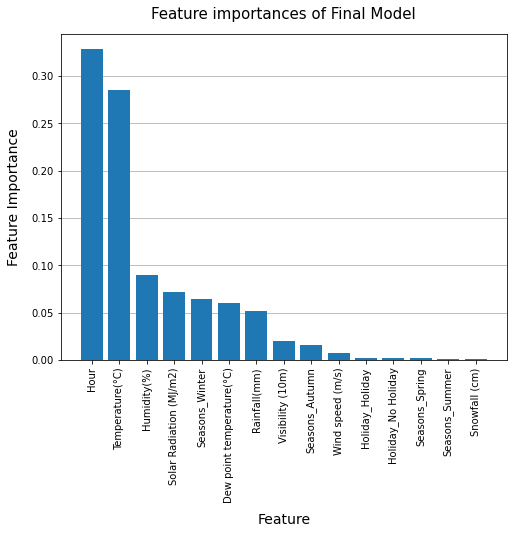

In [109]:
gb_feature_importances = pd.Series(gb.feature_importances_, index=df2.columns[2:])
gb_feature_importances = gb_feature_importances.sort_values(ascending=False)

_=plot_dec('Feature', 'Feature Importance', 'Feature importances of Final Model')
_=plt.bar(gb_feature_importances.index, gb_feature_importances, zorder=3)
_=plt.xticks(rotation=90)

As we suspected from the very beginning, the hour of day and temperature have the most predictive power. The other features do not have much predictive power individually, which is not that surprising. The season of Winter has far more predictive power than the other seasons, which is what we also expected. From this, we can safely say that hour of day and temperature can give you enough information to get a prediction that is roughly correct and we saw this with linear regression. Better predictions may be possible with other algorithms.

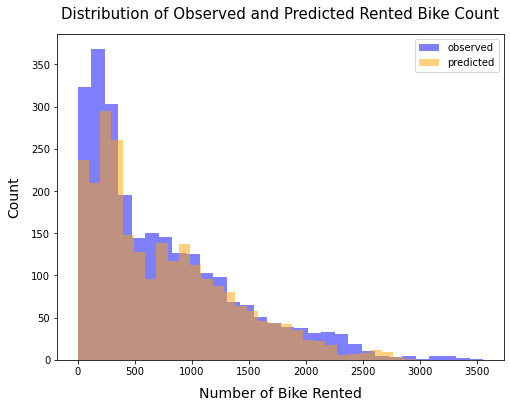

In [110]:
_=plot_dec('Number of Bike Rented', 'Count', 'Distribution of Observed and Predicted Rented Bike Count', grid='no')
_=plt.hist(y2_test, color='blue', alpha=0.5, bins=30, label='observed')
_=plt.hist(np.where(final_pred<0, 0, final_pred), color='orange', alpha=0.5, bins=30, label='predicted')
_=plt.legend()

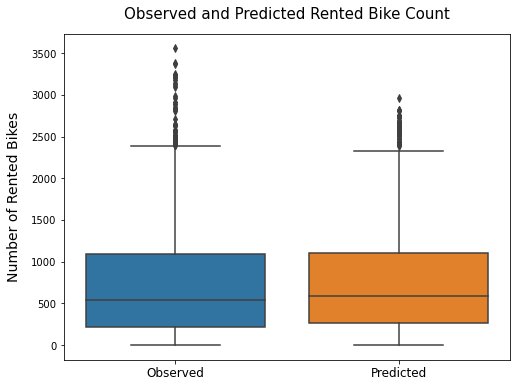

In [111]:
_=plot_dec(y='Number of Rented Bikes', title='Observed and Predicted Rented Bike Count', grid='no')
_=sns.boxplot(data=[np.array(y2_test), np.where(final_pred<0, 0, final_pred)], zorder=3)
_=plt.xticks([0, 1], ['Observed', 'Predicted'], fontsize=12)

The histogram and box plot show us that the predicted values are fairly similar to the observed values regarding their distributions. Negative predictions were zeroed. The gradient boosting algorithm wasn't as effective at grasping the extremities of the number of rented bikes, as indicated by the histogram. All in all however, it does a good job.

## Conclusion

We have learnt a lot in this project and many of our intuitions were proven right. 

We suspected that the hour of day and temperature would have the most predictive power and we were right, but what was unexpected was the unusually high corellation Winter had with the number of rented bikes when compared to the other seasons. After further investigation, we discovered that the reason behind this may be the large proportion of days in Winter that had temperatures below 0° in comparison to the other seasons. 64% of days in Winter had temperatures below 0°, when compared to 1% in Spring and Autumn and 0% in Summer. People probably avoid renting bikes at such cold temperatures. Further investigation can help clarify this.

Another unsuspected surprise was the fact that Autumn, on average, saw higher numbers of rented bikes by temperature than Spring. That is to say that if we were given a day in Spring and a day in Autumn where the temperatures were the same, the day in Autumn would see a higher number of rented bikes. This is despite the nature of these seasons, Spring being related to the blossoming of life and Autumn the end of life. Further investigation can be illuminating.

Another interesting find was that the number of rented bikes decreases steadily as we go beyond a temperature of 30°. The reason behind this may be the discomfort caused by sweat or heat exhaustion.

After our analysis, we moved onto creating predictive models. We started off with linear regression and eventually climbed our way to gradient boosting. We reached a score of 0.86 and an RMSE of 242 which are respectable. With more fine tuning this can be improved but a lack of resources limits our capabilities. Regardless, I think our model is more than sufficient in helping out communities and governing bodies in determining how many bikes will be rented out on a particular day. This will help them in supporting and providing for their communities, which is the ultimate goal.